# Paired Density Matrix
Author(s) Paul Miles | July 17, 2019

This tutorial provides a demonstration of the paired density matrix plotting routine available in `mcmcplot`.

In [1]:
# import required packages
import numpy as np
from mcmcplot import mcmcplot as mcp
import seaborn as sns
import matplotlib.pyplot as plt
import mcmcplot
print(mcmcplot.__version__)

1.0.0rc1


# Generate Random Chains
The plotting routines are designed to be used in conjunction with the result of a MCMC simulation.  For the purpose of this example, we consider a randomly generated chain.  We will consider a chain with 3 parameters that have the following distributions:
- $p_{0} \sim N(1.0, 0.5)$
- $p_{1} \sim N(2.5, 3.0)$
- $p_{2} \sim N(-1.3, 0.75)$

In [2]:
nsimu = 1000
npar = 3
mu = np.array([1.0, 2.5, -1.3])
sig = np.array([0.5, 3.0, 0.75])
chain = np.zeros([nsimu, npar])
for ii in range(npar):
    chain[:,ii] = sig[ii]*np.random.randn(nsimu,) + mu[ii]

# Plot Default Paired Density Matrix
This routine will generate an array of plots, where the components of the array are as follows:

- Main diagonal: 1D, KDE-plot
- Lower triangle: 2D, KDE-plot
- Upper triangle: scatter-plot (pairwise correlation)

Note, that each function call returns the figure handles as well as the settings used to generate the plots.

{'skip': 1, 'pairgrid': {'diag_sharey': False, 'height': 2.5}, 'ld_type': <function kdeplot at 0x1283b3ae8>, 'ld': {}, 'md_type': <function kdeplot at 0x1283b3ae8>, 'md': {}, 'ud_type': <function scatterplot at 0x1283b5ea0>, 'ud': {}}


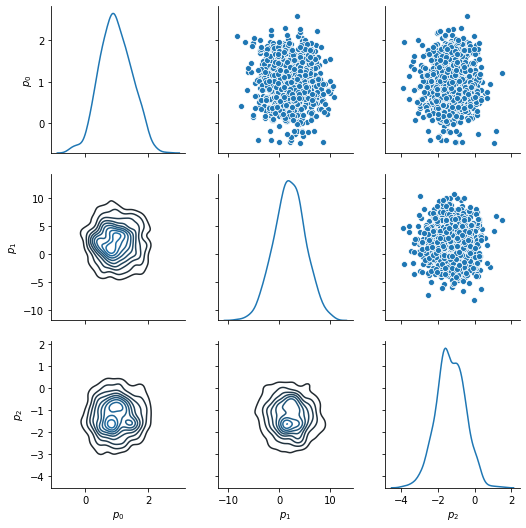

In [4]:
fjd, used_settings = mcp.plot_paired_density_matrix(
    chains=chain,
    settings=None,
    return_settings=True)
print(used_settings)

# Change the Type of Paired Density Plot, Figure Size, Color, Etc.
We can easily adjust the type of paired density plot, size of the figure, and color map.  You can specify different types of plots for the main diagonal, lower triangle, and upper triangle elements.

- `md_type`: Main diagonal plot type.
- `ld_type`: Lower triangle plot type.
- `ud_type`: Upper triangle plot type.

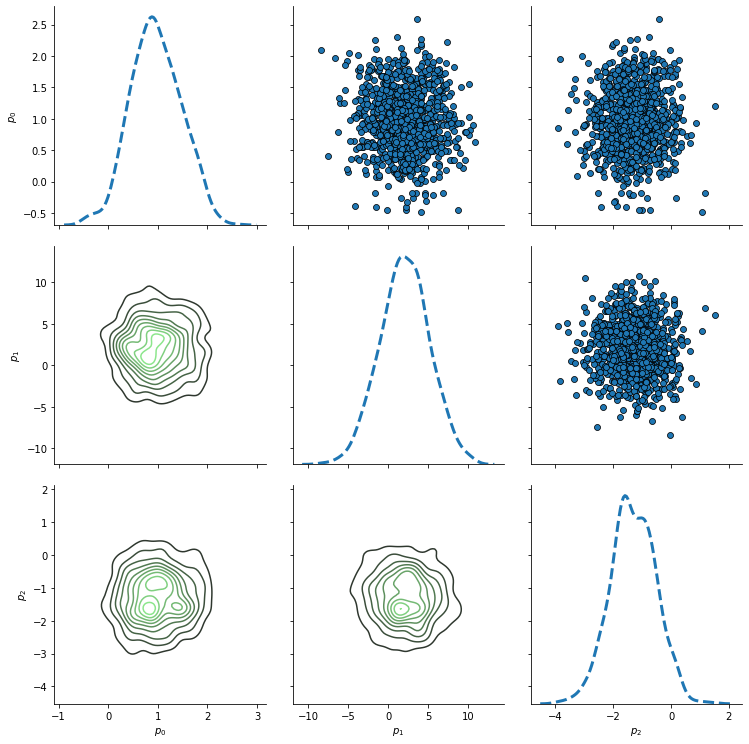

In [6]:
pal = sns.dark_palette("palegreen", as_cmap=True)
settings = dict(
    pairgrid=dict(height = 3.5),
    ld_type=sns.kdeplot,
    ld=dict(cmap=pal),
    md=dict(lw=3, linestyle='--'),
    ud=dict(edgecolor='black'))
fpg = mcp.plot_paired_density_matrix(
    chains=chain,
    settings=settings)

# Edit the seaborn Style
The default seaborn style is `white`, but it can be changed by defining the `sns_style` variable.  Each style has it's own settings, so see the [seaborn style documentation](https://seaborn.pydata.org/tutorial/aesthetics.html) for details.  The seaborn package also allows you to set the context.  For example, you can set the context for `poster` which increases the fontsize and contrast for all plot features.

The seaborn package uses pandas data structures, which makes it extremely amenable to categorical data. Below we demonstrate how to add a category to the data structure by sending the `index` argument to the `plot_paired_density_matrix` method.  For this example, we consider the first half of the chains as "Set 1" and the second half as "Set 2".  In an MCMC simulation, you could distinguish the sets based on when the chain appears to have "burned-in".

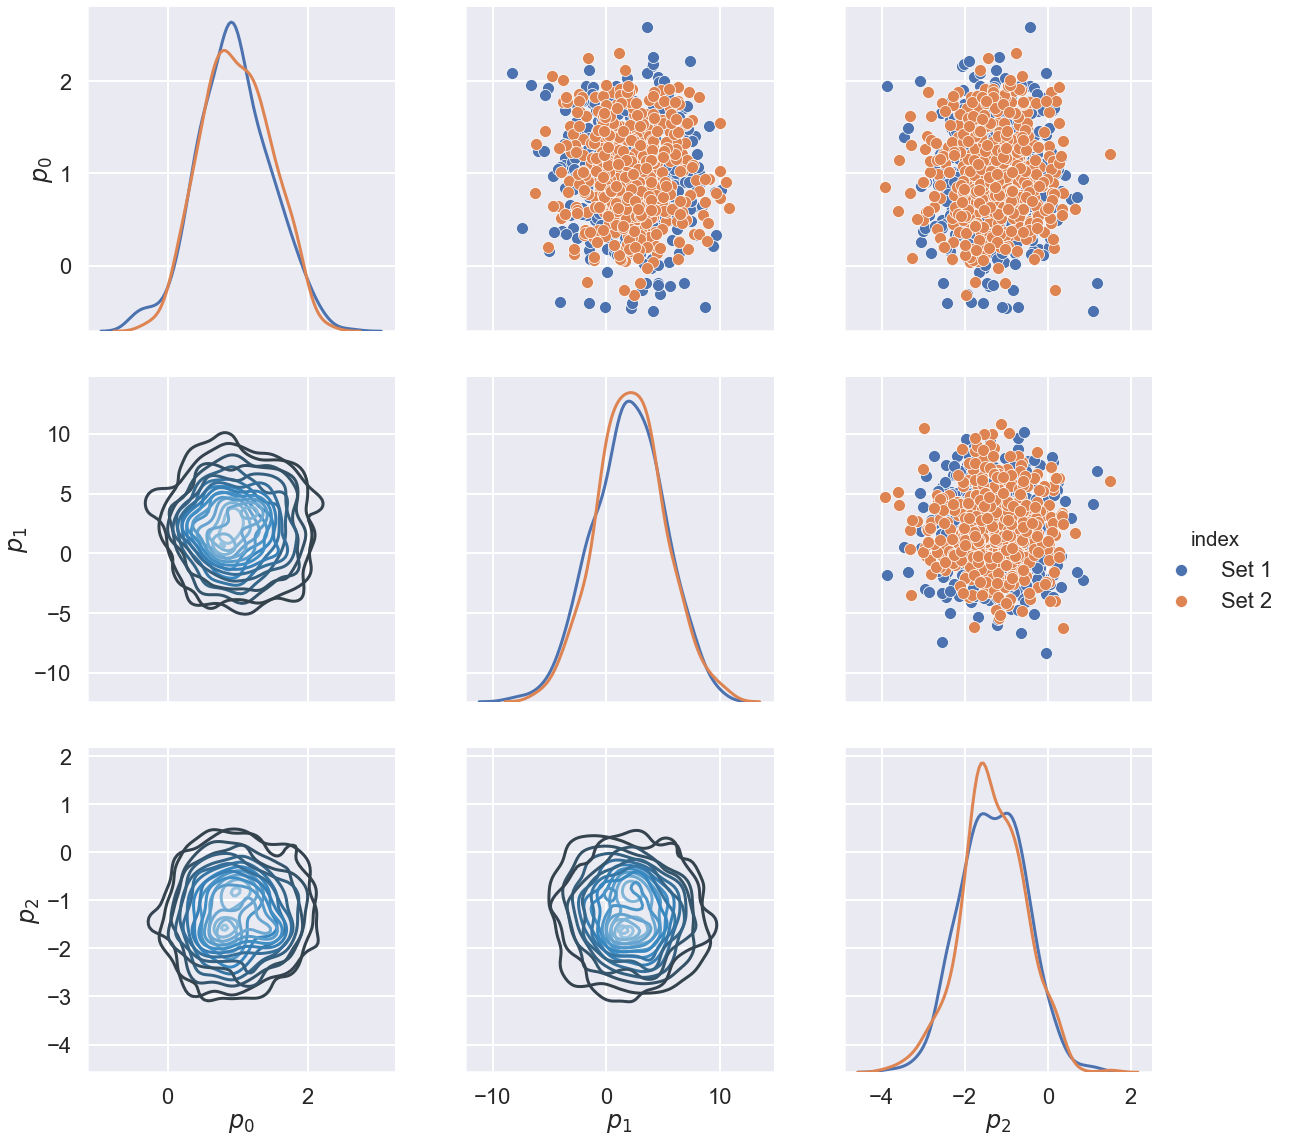

In [11]:
nsimu = chain.shape[0]
index = []
for ii in range(nsimu):
    if ii < nsimu/2:
        index.append('Set 1')
    else:
        index.append('Set 2')
sns.set_context('poster')
sns.set_style('darkgrid')
settings = dict(
    pairgrid=dict(
        height=5.5,
        hue='index'),
    ld_type=sns.kdeplot,
    ld=dict(
        cmap='Blues_d'))
fpg = mcp.plot_paired_density_matrix(
    chains=chain,
    settings=settings,
    index=index)
fpg.add_legend();

# Manually Edit Features
As seaborn is built on top of matplotlib, you can edit various plot features in the same way.  The output from the `plot_paired_density_matrix` method will contain the figure handle from which all other plot features can be accessed.

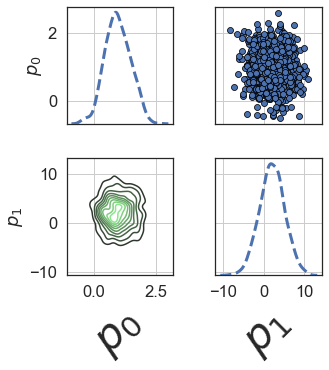

In [26]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white', sns.axes_style({'axes.grid': True}))
settings = dict(
    pairgrid=dict(despine=False),  # adds right and top borders back to plot
    ld=dict(cmap=pal),
    md=dict(lw=3, linestyle='--'),
    ud=dict(edgecolor='black'))
fpg = mcp.plot_paired_density_matrix(
    chains=chain[:, 0:2],
    settings=settings)
# adjust fontsize and orientation of x-labels
axes = fpg.axes.flatten()
for ax in axes:
    tmp = ax.xaxis.get_label()
    tmp.set_fontsize(42)
    tmp.set_rotation(45)